Data Collection & Cleaning

In [3]:
import pandas as pd

df = pd.read_csv('HeartAttack.csv')
df

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [5]:
df.isnull().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [6]:
df.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


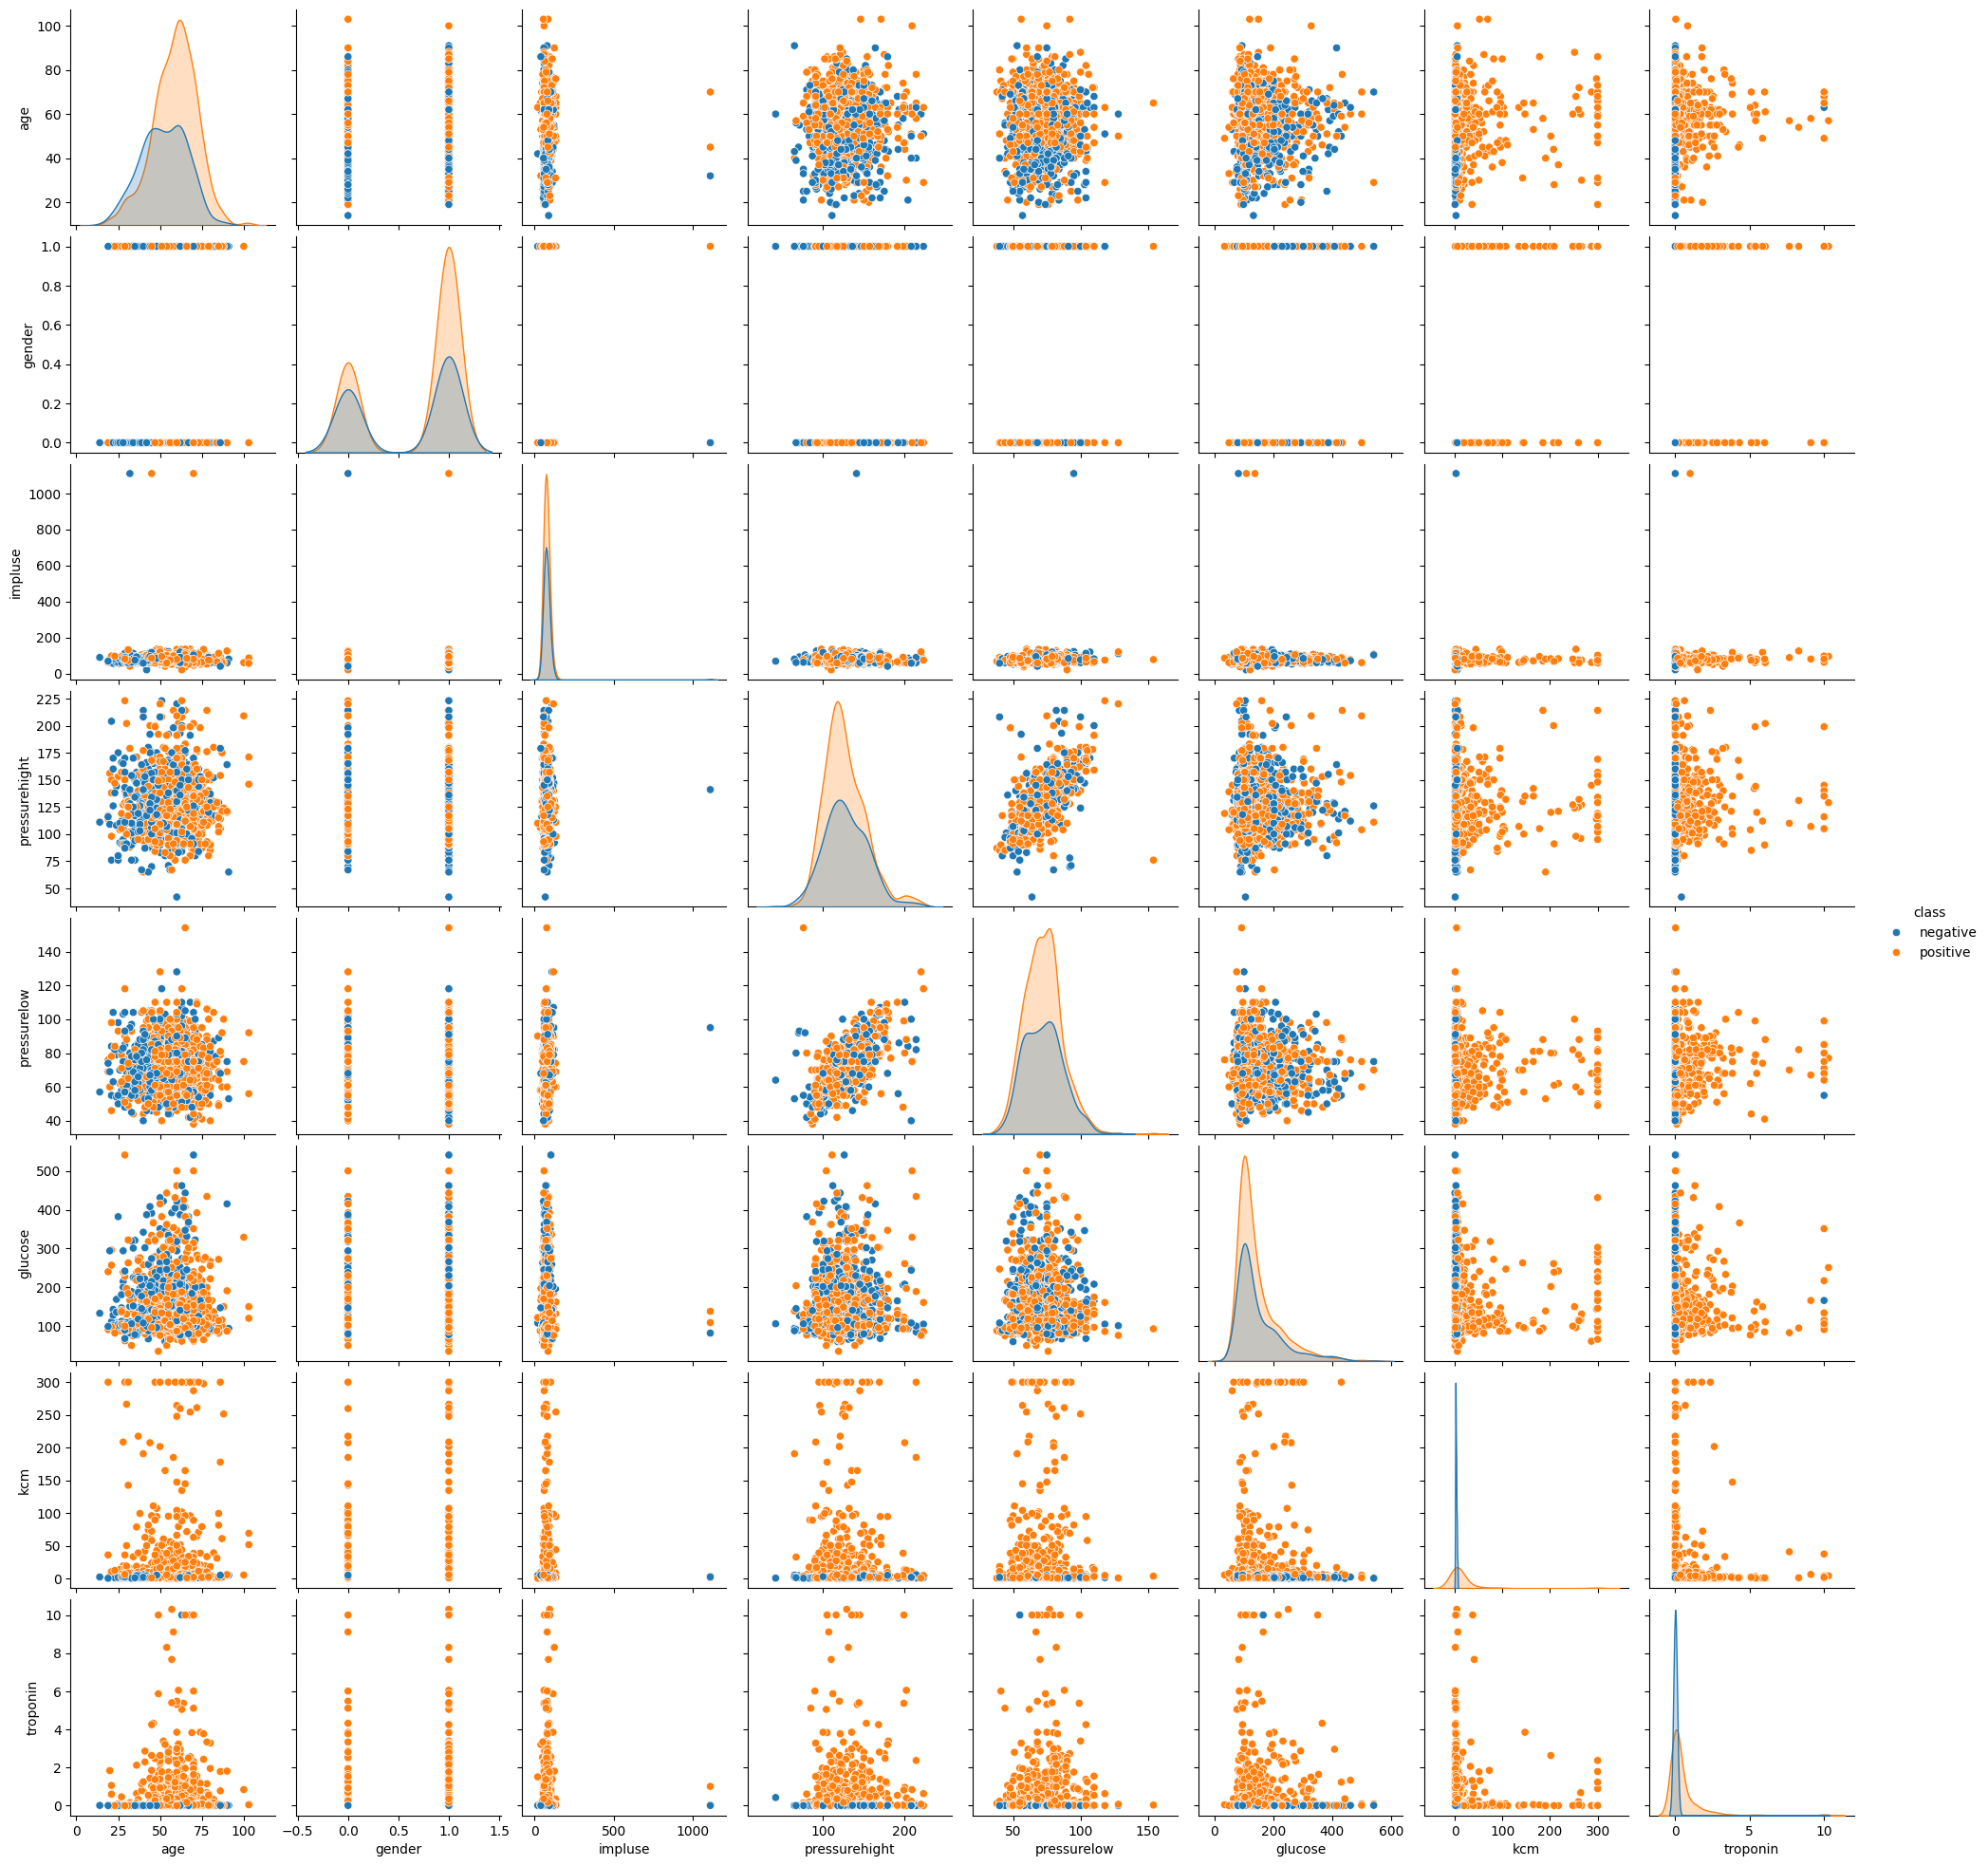

In [7]:
import seaborn  as sns

sns.pairplot(df, hue="class")

In [8]:
# check impulse > 1000
df[df.impluse>1000]

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
63,45,1,1111,141,95,109.0,1.33,1.010,positive
717,70,0,1111,141,95,138.0,3.87,0.028,positive
1069,32,0,1111,141,95,82.0,2.66,0.008,negative


In [9]:
# check troponin >9 & class = negative
df[(df.troponin>9) & (df['class']=='negative')]

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
29,63,1,66,135,55,166.0,0.493,10.0,negative


In [10]:
# drop outliers
df.drop([29, 63, 717, 1069], inplace=True)
df.reset_index(drop=True, inplace=True)
df

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1310,44,1,94,122,67,204.0,1.63,0.006,negative
1311,66,1,84,125,55,149.0,1.33,0.172,positive
1312,45,1,85,168,104,96.0,1.24,4.250,positive
1313,54,1,58,117,68,443.0,5.80,0.359,positive


Feature Selection 

In [11]:
features = ['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose', 'kcm', 'troponin']	

Feature Engineering

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df[features]
y = df['class'].map({'negative': 0, 'positive': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train.shape, X_test.shape

((1052, 8), (263, 8))

1. Logistic Regression Model

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

param_grid_lg = {
    'C': [0.1, 1, 10, 100],  
    'solver': ['lbfgs', 'liblinear', 'newton-cg'], 
    'max_iter': [300, 500, 1000]  
}

grid_search_lg = GridSearchCV(LogisticRegression(random_state=0), param_grid_lg, cv=5, scoring='accuracy')
grid_search_lg.fit(X_train, y_train)

best_model_lg = grid_search_lg.best_estimator_
print("Best Parameters:", grid_search_lg.best_params_)

y_pred_lg = best_model_lg.predict(X_test)
print("Evaluation:", classification_report(y_test, y_pred_lg))

Best Parameters: {'C': 100, 'max_iter': 300, 'solver': 'lbfgs'}
Evaluation:               precision    recall  f1-score   support

           0       0.84      0.95      0.89       101
           1       0.97      0.89      0.93       162

    accuracy                           0.91       263
   macro avg       0.90      0.92      0.91       263
weighted avg       0.92      0.91      0.91       263



2. Random Forest Classifier Model

In [35]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rfc = {
    'n_estimators': [50, 100, 200],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search_rfc = GridSearchCV(RandomForestClassifier(random_state=0), param_grid_rfc, cv=5, scoring='accuracy')
grid_search_rfc.fit(X_train, y_train)

best_model_rfc = grid_search_rfc.best_estimator_
print("Best Parameters:", grid_search_rfc.best_params_)

y_pred_rfc = best_model_rfc.predict(X_test)
print("Evaluation:", classification_report(y_test, y_pred_rfc))

Best Parameters: {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Evaluation:               precision    recall  f1-score   support

           0       0.99      1.00      1.00       101
           1       1.00      0.99      1.00       162

    accuracy                           1.00       263
   macro avg       1.00      1.00      1.00       263
weighted avg       1.00      1.00      1.00       263



3. Support Vector Machine (SVM) Model

In [37]:
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

grid_search = GridSearchCV(SVC(random_state=0), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

y_pred = best_model.predict(X_test)
print("Evaluation:", classification_report(y_test, y_pred))

Best Parameters: {'C': 100, 'kernel': 'linear'}
Evaluation:               precision    recall  f1-score   support

           0       0.86      0.96      0.91       101
           1       0.97      0.90      0.94       162

    accuracy                           0.92       263
   macro avg       0.92      0.93      0.92       263
weighted avg       0.93      0.92      0.92       263

